# **Reconocimiento de Patrones - Proyecto final**
# Reconocimiento de letras del alfabeto inglés
# Lic.-Ing. Daniel Kohkemper

________________________________________________________________________________________________

# 1. Introducción

## 1.1 Naturaleza del set de datos

El archivo de datos de este proyecto fue creado en 1991 por David Slate [1]. El mismo consiste en un conjunto de valores estadísticos obtenidos de imágenes rectangulares en blanco y negro de las 26 letras del alfabeto inglés y cada imagen fue levemente distorsionada. Los datos no presentan valores faltantes y vienen en formato numérico (no existen valores categóricos), lo cual facilita mucho el preprocesamiento de los mismos. 

Existen 20.000 muestras del alfabeto inglés, lo cual da un promedio de 769 muestras por letra. Se utilizaron 20 tipos de fuente diferentes, con 5 tipos diferentes de trazo y 6 tipos diferentes de letras, generados de manera aleatoria siguiendo una distribución uniforme.

En 1991, este problema se consideraba uno difícil, debido a ''la amplia diversidad de fuentes y la naturaleza primitiva de los datos''. En el trabajo de Slate [2] se encuentra el proceso de obtención de los datos de manera más detallada, el cual en la actualidad se puede describir como un trabajo de la rama del Procesamiento de Imágenes. Un ejemplo de las letras utilizadas se puede observar en la siguiente figura:

![Título](fig/letras_ex.png)

Para cada imagen, se obtuvieron diferentes métricas y estadísticas, las cuales fueron normalizadas en un rango de 0 a 15 descritas a continuación. 

1.	lettr	Letra mayúscula	(26 valores de A a Z) 
2.	x-box	posición horizontal de la imagen
3.	y-box	posición vertical de la imagen
4.	width	ancho de la imagen en pixeles
5.	high    alto de la imagen en pixeles
6.	onpix	# total de pixeles en el caracter
7.	x-bar	media horizontal (x) de pixeles encendidos
8.	y-bar	media vertical (y) de pixeles encendidos
9.	x2bar	media cuadrática horizontal de 7.
10.	y2bar	media cuadrática vertical de 8.
11.	xybar	media de correlación x y
12.	x2ybr	media de x * x * y 
13.	xy2br	media de x * y * y
14.	x-ege	valor medio de bordes de izq a der
15.	xegvy	correlación de bordes en x con y	
16.	y-ege	valor medio de bordes de abajo hacia arriba
17.	yegvx	correlación de bordes en y con x

El conjunto de datos fue utilizado en un estudio realizado por D. Slate, que utiliza un sistema de clasificación adaptativa basado en aquel de J.H. Holland, el cual consiste en la creación de una lista de reglas condición-acción (clasificadores) que son aplicadas en paralelo a un conjunto de mensajes (entradas).

## 1.2 Aprendizaje de máquina basado en reglas

Esta rama abarca cualquier método que identifica, aprende o evoluciona un conjunto de reglas. El conocimiento completo del sistema se basa en las relaciones que se puedan hacer entre los datos de entrada con sus salidas por medio del conjunto de reglas. Estos sistemas dependen de conocimiento contextual de la semántica de los datos, por lo que su uso no es universal y aplica dentro del propio significa de los datos. Típicamente, las reglas se generan en la forma IF ... THEN, es decir, condición y resultado.

Estos sistemas tienen alguna semejanza con los árboles de decisión, así como también poseen varias diferencias. En los sistemas basados en reglas, se puede hacer un enfoque top-down o bottom-up con el que se puede llegar a una clasificación de lo general a lo particular o viceversa. Los árboles de búsqueda siguen más bien una direción top-down. Por otro lado, en un sistema de reglas, estas son generadas por un humano, mientras que en un árbol se generan a partir de las propiedades estadísticas y la distribución de los datos. Usualmente se decide usar la última cuando el sistema es muy complejo de entender para poder crear las reglas de manera manual, las cuales dependen de la habilidad del diseñador de poder describir enteramente el problema.

## 1.3 Metodología de la investigación

El sistema propuesto por D. Slate consiste en los siguientes pasos:

1. Un algoritmo de desempeño que compara las reglas con los mensajes para determinar cuáles reglas deben ser activadas.
2. Un algoritmo de reforzamiento que modifica el puntaje o fuerza de cada regla.
3. Un algoritmo que crea reglas que generaliza ejemplares o combina reglas para crear nuevas.

El aprendizaje del sistema se realizó mediante la separación del set de datos de 20.000 en 16.000 datos de entrenamiento y 4.000 de prueba, lo que representa un porcentaje de 80%-20%. El programa se corrió 5 veces con el set de entrenamiento (se presupone una cross-validación) en lo que se crearon nuevas reglas, se descartaron las insatisfactorias y se modificaron las estadísticas respectivamente de cada regla. De esta manera se logró expandir el conjunto de pruebas a 80.000. La sexta pasada se realizó sin generar nuevas reglas, y aquellas que no lograron cumplir los niveles de desempeño pre-establecidos fueron descartadas. Finalmente, se estimuló el sistema con el set de prueba para determinar el nivel global de desempeño del sistema, en el cual no se generaron ni modificaron reglas, sino que se obtuvieron las métricas de desempeño finales.

El sistema de clasificación se describe a continuación:

1. Comparar el vector de atributos de un ítem de prueba (muestra) con los atributos especificados para cada clasificador en la regla actual.
2. Seleccionar un set que se ajuste [M] que consiste en todos los clasificadores cuyas condiciones son satisfechas por el vector de atributos de la muestra.
3. Calcular un puntaje (o apuesta) para cada clasificador del set M. Asignar la categoría asociada con el puntaje máximo como salida del sistema.
4. Si se está en fase de aprendizaje, modificar las estadísticas de desempeño de uno o más clasificadores como es especificado por el sistema de puntajes.
5. Si se está en la fase de aprendizaje, descartar las reglas débiles y crear nuevas reglas de acuerdo al algoritmo de creación de reglas.
6. Seleccionar el siguiente ítem de prueba (muestra) y repetir el proceso.

De manera resumida, el sistema de codificación de atributos utiliza tres métodos distintos: binario (BIN), codificación Gray (GRA) y entero (INT). El sistema de creación de reglas se realiza por medio de varios métodos: aleatorio (RAN), híbrido (HYB), 
mutación (MUT), combinación de dos reglas (CROSS) y generalización basada en ejemplos (EXM). Una explicación más detallada de estos procedimientos además del sistema de puntaje puede revisarse en [2].

La investigación reporta un porcentaje de correcta clasificación de muestras de la siguiente manera:

1. Binario:   43,2% - 54,7%
2. Gray Code: 45,9% - 59,3%
3. Entero:    70,4% - 80,0%

## 1.4 Conclusiones preliminares sobre el estudio

Se observa que este estudio tiene casi 30 años de haberse realizado, lapso en el cual las metodologías y tecnologías de reconocimiento de patrones y aprendizaje supervisado han avanzado bastante. El método de clasificación por reglas es poco utilizado actualmente, con lo que sería un buen caso de estudio probar el set de datos con métodos más utilizados recientemente, e incluso por medio de redes neuronales.

________________________________________________________________________________________________


# 2. Metodología del Proyecto

En el presente proyecto se propone crear un benchmark de diferentes métodos de aprendizaje supervisado, con el set de datos mencionado anteriormente. Se aprovecha el hecho que el mismo fue analizado con aprendizaje basado en reglas, método no muy común en la actualizad debido a la aparición de métodos más poderosos, como lo son incluso las redes neuronales. Dicho esto, se procesará el set de datos con diversos métodos, se analizarán los resultados y finalmente se comentará y compararán estos resultados con respecto al estudio realizado por D. Slate.

En casi todo proyecto de reconocimiento de patrones y análisis de datos, se siguen los siguientes pasos:

1. Preprocesamiento
2. Aprendizaje
3. Evaluación 
4. Predicción

La primera etapa será común a los diferentes métodos de aprendizaje, en donde se estudiarán los datos de manera gráfica y estadística para realizar un análisis exploratorio y tener una mejor noción de los mismos. Cualquier muestra que presente alteraciones será eliminada o modificada, y en general, el formato de las categorías serán modificados de acuerdo a la necesidad de los algoritmos posteriores. Los pasos 2, 3 y 4 se realizarán de acuerdo a cada método propuesto, los cuales incluyen:

1. k-Nearest Neighbors
2. Decision Trees
3. Redes Neuronales con TFLearn
4. Redes Neuronales con Keras

________________________________________________________________________________________________

# 3. Preprocesamiento

En esta sección se cargan las bibliotecas necesarias durante todo el proyecto (las bibliotecas específicas a cada modelo se indican igual aunque en línea comentada). Seguidamente se carga el set de datos de la dirección URL, se agrega el encabezado de los datos (que debe coincidir con cada columna de datos; el nombre del atributo se debe obtener de la explicación del set de datos). En caso de existir valores faltantes se eliminan. Además cualquier atributo que contenga valores no numéricos, deben ser convertidos o codificados a un formato numérico. En este caso, la clase de cada muestra (letra que representan el conjunto de mediciones), debe ser convertida a formato numérico, particularmente para el uso con redes neuronales.

Se indicó anteriormente que el set de datos es bastante íntegro y en general no posee valores faltantes, outliers ni datos no balanceados. Se cargan además las bibliotecas básicas y se asignan los nombres de los atributos del set de datos así como la variable de salida.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN
from sklearn.utils import column_or_1d
import matplotlib.image as mpimg
from keras.utils import to_categorical

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=DeprecationWarning, append=True)

# URL address of data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

# Define header of dataset, obtain this information from dataset information
# This is taken from the data set itself
header = ['letter', 'x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# load dataset as csv file
df = pd.read_csv("data/letter_recognition.data",header=None,names=header)

# if dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# Print some values of the data set
df.head(5)

Using TensorFlow backend.


,letter,x_box,y_box,width,high,onpix,x_bar,y_bar,x2bar,y2bar,xybar,x2ybr,xy2br,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Para facilitar el manejo y graficación de los datos, se reducirá el set de datos temporalmente a las 5 vocales del alfabeto.

In [2]:
df_vowels = df[(df.letter == 'A') | (df.letter == 'E') | (df.letter == 'I') | (df.letter == 'O') | (df.letter == 'U')]
df_set1   = df[(df.letter == 'Q') | (df.letter == 'U') | (df.letter == 'O') | (df.letter == 'D') | (df.letter == 'G') | (df.letter == 'C') | (df.letter == 'B')]  
df_set2   = df[(df.letter == 'O') | (df.letter == 'I') | (df.letter == 'H') | (df.letter == 'Z') | (df.letter == 'M')]  
df_set3   = df[(df.letter == 'O') | (df.letter == 'I') ]  

df_vowels.head(5)

df_test = df_vowels

Ahora se separan los atributos y la clase en variables separadas, para los procesos de entrenamiento

In [3]:
# from sklearn import preprocessing

# Make a list of features only
features = ['x_box', 'y_box', 'width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege', 'yegvx']

# Separate features from class
input_features = df_test.loc[:,features].values
output_class   = df_test.loc[:,['letter']].values
# Squeeze output into one single column
output_class   = output_class.ravel()

# Print variable to verify classes are the ones selected
output_class

array(['I', 'A', 'O', ..., 'O', 'E', 'A'], dtype=object)

Ahora se crea una copia de la clase codificada con valores numéricos para el entrenamiento de las redes neuronales

In [4]:
# Make a copy of class values (letters at this points)
output_class_num = df_test.loc[:,['letter']].values
# Squeeze output into one single column
output_class_num= output_class_num.ravel()

# Apply label encoder to convert letters to numbers (this will be needed for the neural network)
le = preprocessing.LabelEncoder()
output_class_num[:] = le.fit_transform(output_class_num[:])

# Print variable to verify classes are numbers
print(output_class_num[1:20])


[0 3 3 3 3 1 1 1 1 0 1 3 3 4 2 1 2 4 0]


Ahora creamos una lista de los atributos tomando en cuenta el dataset completo (todas las letras).

In [5]:
# Separate features from class
in_feats_all  = df.loc[:,features].values
out_class_all = df.loc[:,['letter']].values
# Squeeze output into one single column
out_class_all = out_class_all.ravel()

# Print variable to verify classes are the ones selected
out_class_all

# Make a copy of class values (letters at this points)
out_class_all_num = df.loc[:,['letter']].values
# Squeeze output into one single column
out_class_all_num= out_class_all_num.ravel()

# Apply label encoder to convert letters to numbers (this will be needed for the neural network)
le = preprocessing.LabelEncoder()
out_class_all_num[:] = le.fit_transform(out_class_all_num[:])

# Print variable to verify classes are numbers
print(out_class_all_num[1:20])

[8 3 13 6 18 1 0 9 12 23 14 6 12 17 5 14 2 19 9]


## 2.2 Análisis exploratorio de datos

Antes de proceder con el aprendizaje automático, se realiza un análisis exploratorio de los datos por medio de gráficas y aprendizaje no supervisado para poder tener más información y sentido del set de datos.

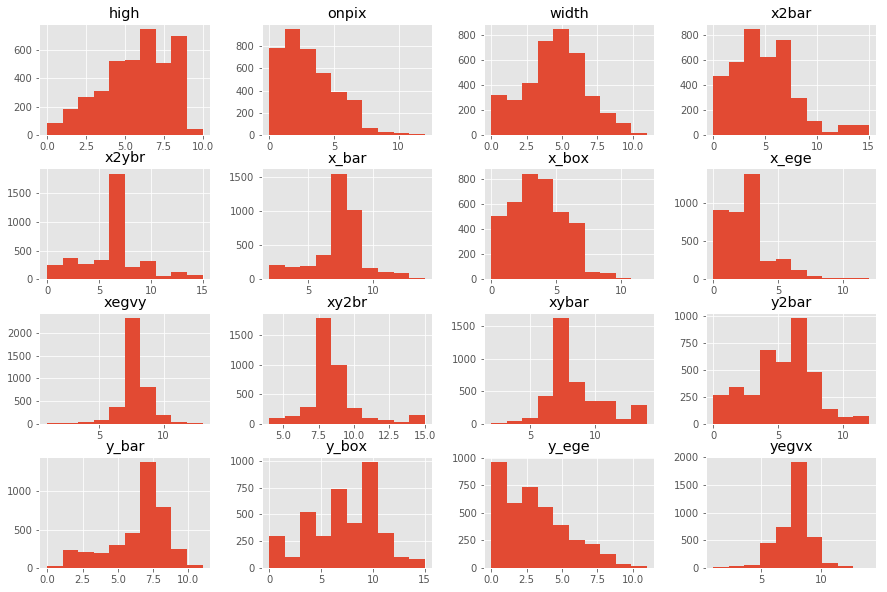

In [6]:
%matplotlib inline
plt.style.use('ggplot')
pd.DataFrame.hist(df_test, figsize = [15,10]);

In [7]:
from sklearn.model_selection import train_test_split

# Separate data intro training and test sets
# Use 20% for test, as indicated in original study
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=50)

output_class

array(['I', 'A', 'O', ..., 'O', 'E', 'A'], dtype=object)

## 2.3 Análisis PCA

Ahora se realiza un análisis de componentes principales para determinar cómo es el comportamiento e importancia de los diferentes atributos del set de datos con respecto a la clasificación. Se realiza posteriormente el mismo estudio pero escalando los datos. Vale indicar que se está utilizando un set de datos reducido con las 5 vocales, para que la graficación se observe mejor.

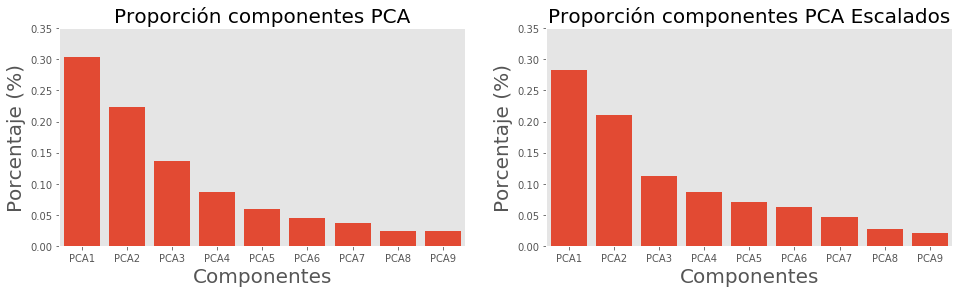

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the features
input_feat_scaled = StandardScaler().fit_transform(input_features)
# Obtain number of atributes
n_atributes = input_features.shape[1]

# Set PCA model with number of features
pca = PCA(n_components = input_features.shape[1])
# Get principal components from model
principalComponents = pca.fit_transform(input_features)

# Conform PCA ticks
pca_features = ['PCA' + str(i) for i in range(n_atributes)]
#principalDf1 = pd.DataFrame(data = principalComponents, columns = pca_features)

# Plot data
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1) 
#Grafica las componentes de PCA según su porcentaje
ax.bar(range(n_atributes), pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 20)
ax.set_xticklabels(pca_features)
ax.set_ylabel('Porcentaje (%)', fontsize = 20)
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(0.00, 0.35)
ax.set_title('Proporción componentes PCA', fontsize = 20)
ax.grid()

# Set PCA model with number of features
pca_scaled = PCA(n_components = input_feat_scaled.shape[1])
# Get principal components (scaled) from model
principalComponents_scaled = pca.fit_transform(input_feat_scaled)

# Nombra cada una de las componentes del PCA
#principalDf = pd.DataFrame(data = principalComponents_scaled, columns = pca_features)

# Plot data
ax = fig.add_subplot(1,2,2) 
ax.bar(range(n_atributes), pca.explained_variance_ratio_)
ax.set_xlabel('Componentes', fontsize = 20)
ax.set_xticklabels(pca_features)
ax.set_xlim(-0.5, 8.5)
ax.set_ylim(0.00, 0.35)
ax.set_ylabel('Porcentaje (%)', fontsize = 20)
ax.set_title('Proporción componentes PCA Escalados', fontsize = 20)
ax.grid()

Al observar que el análisis PCA en ambos casos arroja una distribución de componentes muy parecida, queda claro que no es necesario escalar los atributos para el posterior uso en los diversos métodos de clasificación. Esto puede ser incluso una conclusión lógica, al saber de antemano que los datos ya vienen normalizados en valores enteros de 1 a 15.

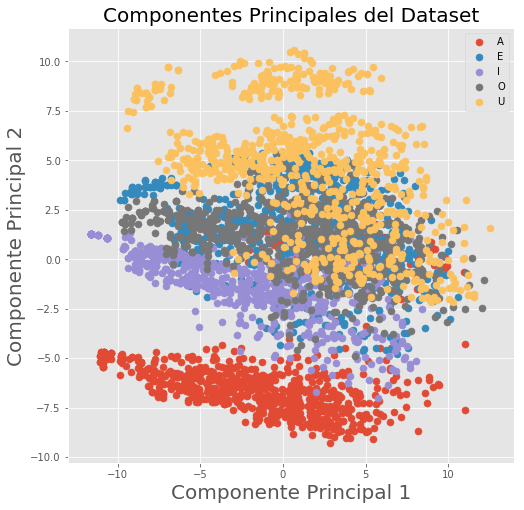

In [9]:
#from sklearn.utils import column_or_1d
#from sklearn import preprocessing

# Shut warnings
import warnings
warnings.filterwarnings('ignore', category=UnicodeWarning, append=True)

# Set PCA model with 2 components
pca = PCA(n_components=2)

# Get principal components of the data set (unscaled)
princ_comps = pca.fit_transform(input_features)
# Convert to dataframe
princ_comps_df = pd.DataFrame(data = princ_comps)

# Get the classes of letter
le = preprocessing.LabelEncoder()
le.fit(df_test[['letter']])
targets = le.classes_.ravel()

# Flush index of new dataframe
df_test_flushed = df_test.reset_index(drop=True)

# cat PCA components with respective letter
pca_two_comps_df = pd.concat([princ_comps_df, df_test_flushed[['letter']]], axis = 1)

# Plot figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 20)
ax.set_ylabel('Componente Principal 2', fontsize = 20)
ax.set_title('Componentes Principales del Dataset', fontsize = 20)

# Group all targets
for target in targets:
    # Look for indices that match with target
    indices = pca_two_comps_df['letter'] == target
    # Plot data
    ax.scatter(pca_two_comps_df.loc[indices, 0],
               pca_two_comps_df.loc[indices, 1],
               s = 50)
ax.grid()
ax.legend(targets)
ax.grid()

Del análisis PCA se observa que los datos siguen un leve patrón de agrupamiento pero algunas vocales se mezclan con otras. Intentar un aprendizaje no supervisado, bajo esta perspectiva, no daría buenos resultados debido a lo mezclados que se encuentran los datos en sus componentes principales, como se verá a continuación.

## 2.4 Aprendizaje No Supervisado

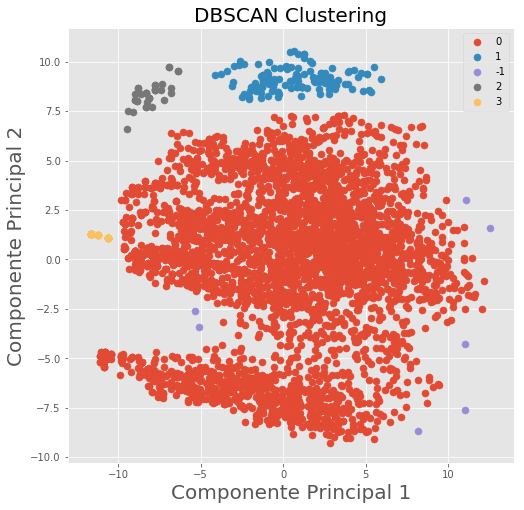

In [10]:
#from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
clustering = DBSCAN(eps=1, min_samples=5, algorithm = 'brute').fit(princ_comps_df)

# Get labels from model
dbscan_labels = pd.DataFrame(data = clustering.labels_)

# Get labels by index
targets = pd.unique(clustering.labels_)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 20)
ax.set_ylabel('Componente Principal 2', fontsize = 20)
ax.set_title('DBSCAN Clustering', fontsize = 20)

# Plot components
for target in targets:
    # Search dbscan lables than match with target
    indices = dbscan_labels[0] == target
    # Plot components
    ax.scatter(princ_comps_df.loc[indices, 0],
               princ_comps_df.loc[indices, 1],
               s = 50)
ax.grid()    
ax.legend(targets)
ax.grid()

Después de jugar con los parámetros del algoritmo DBSCAN, a decir, el valor de eps y cantidad mínima de muestras, el algoritmo no logra separar las muestras del centro, que se ven en color rojo, debido a la cercanía que hay entre ellas y la falta de un agrupamiento claro y definido.

De esta manera se observa que no es posible utilizar aprendizaje no supervisado para separar el conjunto de datos, por lo que se aplicarán diversos métodos de aprendizaje supervisado.

# 3. Evaluación de diversos métodos de aprendizaje supervisado



Para poder evaluar correctamente los métodos de aprendizaje automático se utilizará un método de evaluación de curvas de aprendizaje, adaptado de [3].

In [11]:
# Function to plot learning curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 3.1 k-Nearest Neighbors

### 3.1.1 Set de datos reducido


In [12]:
#from sklearn.neighbors import KNeighborsClassifier

# Separate data intro training and test sets
# Use 20% for test, as indicated in original study
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

train_acc = []
test_acc  = []

neighbors_range = range(1, 30)

for num_of_neighbors in neighbors_range:
    # Generate kNN model
    knn = KNeighborsClassifier(n_neighbors = num_of_neighbors)
    knn.fit(x_train, y_train)
    # append trainning accuracy of current train score
    train_acc.append(knn.score(x_train, y_train))
    # append test accuracy of current test score
    test_acc.append(knn.score(x_test, y_test))

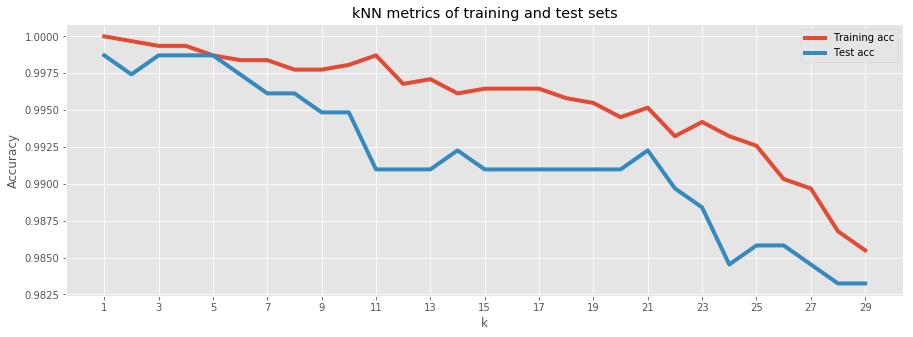

In [16]:
# Plot results
plt.plot(neighbors_range, train_acc, label="Training acc", linewidth=4.0)
plt.plot(neighbors_range, test_acc,  label="Test acc",     linewidth=4.0)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.title("kNN metrics of training and test sets")
plt.legend()
plt.rcParams["figure.figsize"] = [15,5]
plt.xticks(np.arange(1, 30, step=2));

In [14]:
# Get parameters of model
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

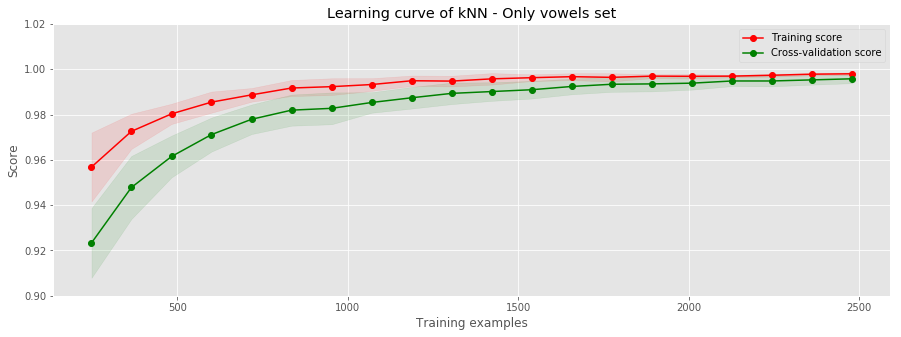

In [15]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

# Select classifier
estimator = KNeighborsClassifier(n_neighbors = 5)

# Plot learning curves
title = "Learning curve of kNN - Only vowels set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.90, 1.02), cv=cv, n_jobs=4)

plt.grid()
plt.show()

### 3.1.2 Set de datos completo

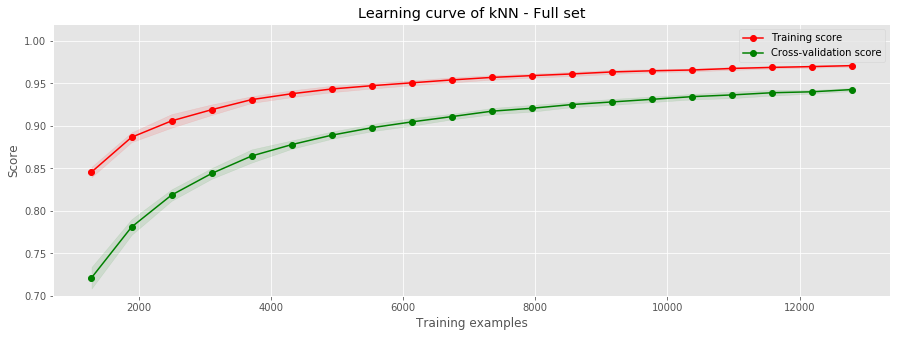

In [17]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

# Select classifier
estimator = KNeighborsClassifier(n_neighbors = 5)

# Plot learning curves
title = "Learning curve of kNN - Full set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.70, 1.02), cv=cv, n_jobs=4)

plt.grid()
plt.show()

## 3.2 Árboles de decisión

### 3.2.1 Set de datos reducido


In [18]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

train_acc = []
test_acc  = []

max_depth_range = range(1, 20)

for max_depth_val in max_depth_range:
    # Generate Decision Tree model
    decision_tree = DecisionTreeClassifier(max_depth=max_depth_val, random_state=0)
    decision_tree.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    train_acc.append(decision_tree.score(x_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(decision_tree.score(x_test, y_test))

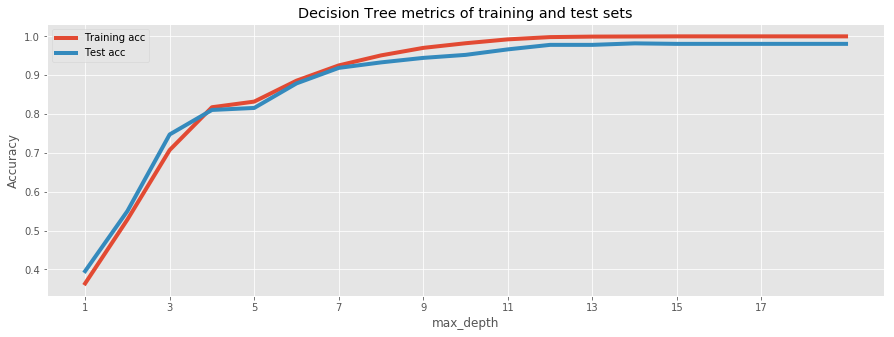

In [19]:
# Plot results
plt.plot(max_depth_range, train_acc, label="Training acc", linewidth=4.0)
plt.plot(max_depth_range, test_acc,  label="Test acc",     linewidth=4.0)
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.title("Decision Tree metrics of training and test sets")
plt.legend()
plt.rcParams["figure.figsize"] = [15,5]
plt.xticks(np.arange(1, max(max_depth_range), step=2));

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=13, random_state=0)
decision_tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(decision_tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree.score(x_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.978


In [21]:
print("Feature importances:\n{}".format(decision_tree.feature_importances_))

Feature importances:
[0.00076877 0.00369262 0.00060541 0.00806752 0.00299529 0.00096865
 0.00587212 0.12049914 0.05368896 0.03044113 0.20476324 0.03792433
 0.17991764 0.01093015 0.28169968 0.05716535]


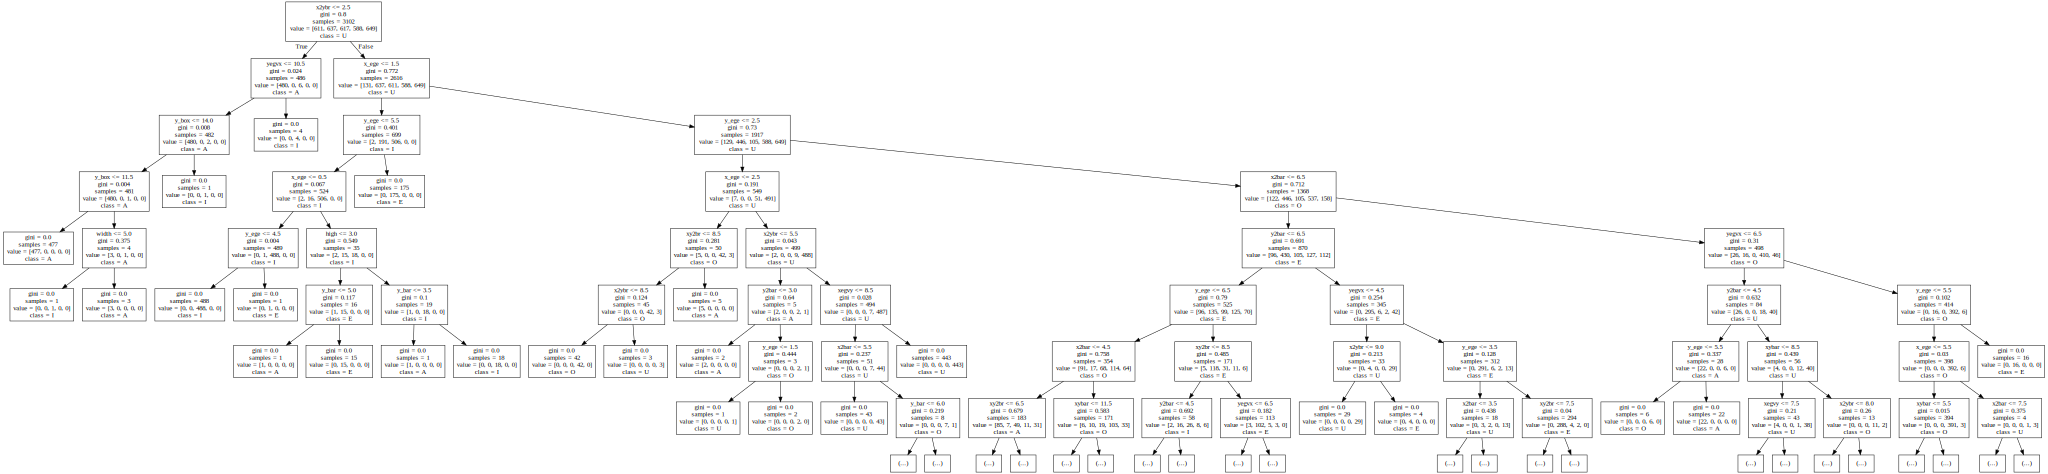

In [22]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot_data) 
#graph.render("decision_tree") 

dot_data = tree.export_graphviz(decision_tree, \
                               max_depth = 7, \
                               out_file = None,
                               feature_names = features,\
                               class_names = ["A", "E", "I", "O", "U"],\
                               leaves_parallel = False) 
graph = graphviz.Source(dot_data)  
graph

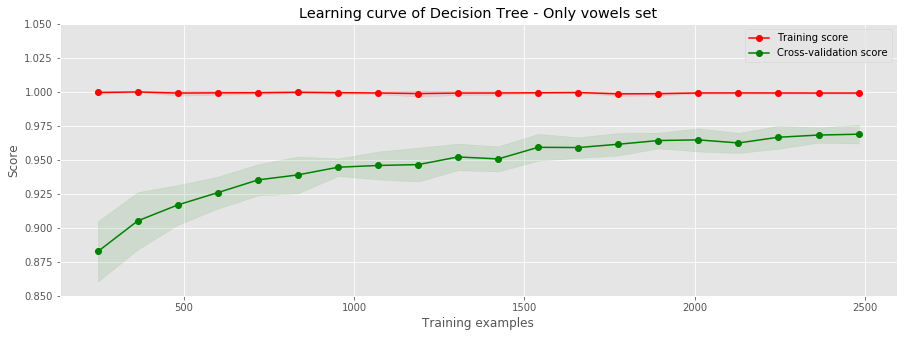

In [23]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

# Select classifier
estimator = DecisionTreeClassifier(max_depth = 13, random_state=0)

# Plot learning curves
title = "Learning curve of Decision Tree - Only vowels set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.85, 1.05), cv=cv, n_jobs=4)

plt.grid()
plt.show()

### 3.2.2 Set de datos completo

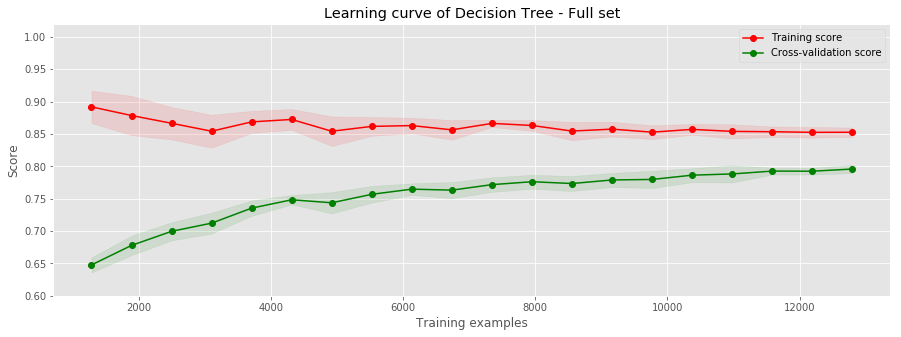

In [24]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

# Select classifier
estimator = DecisionTreeClassifier(max_depth = 13, random_state=0)

# Plot learning curves
title = "Learning curve of Decision Tree - Full set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.60, 1.02), cv=cv, n_jobs=4)

plt.grid()
plt.show()

## 3.3 Support Vector Machines

### 3.3.1 Set de datos reducido


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

# Generate linear model
#svclassifier = SVC(kernel='linear', C=100.0, gamma=0.1)
svclassifier = SVC(kernel='poly', degree=3, gamma='auto')
#svclassifier = SVC(kernel='rbf', gamma='auto')  

# Fit the model using x_train as training data and y_train as target values
svclassifier.fit(x_train, y_train)
# Predict the output with the test set as input
y_pred = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[177   0   1   0   0]
 [  0 131   0   0   0]
 [  0   0 138   0   0]
 [  0   0   0 164   1]
 [  0   1   0   1 162]]
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       178
           E       0.99      1.00      1.00       131
           I       0.99      1.00      1.00       138
           O       0.99      0.99      0.99       165
           U       0.99      0.99      0.99       164

   micro avg       0.99      0.99      0.99       776
   macro avg       0.99      1.00      0.99       776
weighted avg       0.99      0.99      0.99       776

Accuracy: 0.9948453608247423


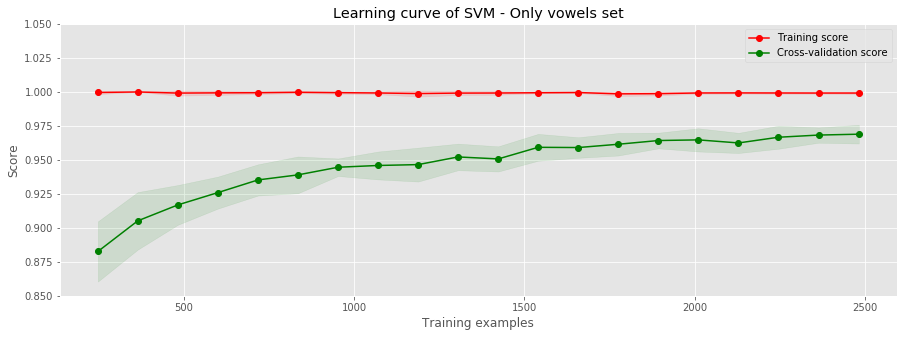

In [28]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

# Select classifier
svclassifier = SVC(kernel='poly', degree=3, gamma='auto')

# Plot learning curves
title = "Learning curve of SVM - Only vowels set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.85, 1.05), cv=cv, n_jobs=4)

plt.grid()
plt.show()

### 3.3.2 Set de datos completo

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all, test_size=0.20, random_state=0)

# Generate linear model
svclassifier = SVC(kernel='poly', degree=3, gamma='auto')

# Fit the model using x_train as training data and y_train as target values
svclassifier.fit(x_train, y_train)
# Predict the output with the test set as input
y_pred = svclassifier.predict(x_test)

#print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.93      0.92       158
           C       0.95      0.97      0.96       156
           D       0.95      0.95      0.95       171
           E       0.93      0.95      0.94       145
           F       0.97      0.94      0.95       167
           G       0.94      0.95      0.94       182
           H       0.90      0.91      0.90       123
           I       0.97      0.96      0.96       127
           J       0.96      0.96      0.96       159
           K       0.91      0.94      0.92       143
           L       0.97      0.96      0.96       159
           M       0.99      0.99      0.99       173
           N       0.94      0.98      0.96       134
           O       0.97      0.95      0.96       142
           P       0.96      0.96      0.96       165
           Q       1.00      0.96      0.98       145
           R       0.94    

In [ ]:
# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all, test_size=0.20, random_state=0)

# Cross validation with 10 iterations and 20% of samples as test
# Use ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)

# Select classifier
svclassifier = SVC(kernel='poly', degree=3, gamma='auto')

# Plot learning curves
title = "Learning curve of SVM - Full set"
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.60, 1.02), cv=cv, n_jobs=4)

plt.grid()
plt.show()

## 3.4 Redes Neuronales con TFLearn

### 3.4.1 Set de datos reducido

In [31]:
# Import Numpy, TensorFlow, TFLearn
import numpy as np
import tensorflow as tf
import tflearn

In [32]:
from sklearn.model_selection import train_test_split

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class_num, test_size=0.20, random_state=50)

In [34]:
tf.reset_default_graph()

# Build neural network
net = tflearn.input_data(shape=[None, 16])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 5, activation='softmax')
net = tflearn.regression(net)
# Define model
model = tflearn.DNN(net)

In [35]:
# Training
N = len(y_train)
y_train_p = [0]*N
for n in range(0,N):
    y_train_p[n] = [0]*5
    y_train_p[n][y_train[n]] = 1

model.fit(x_train, y_train_p, validation_set=0.1, show_metric=True, batch_size=10, n_epoch=10)

Training Step: 2799  | total loss: 0.20126 | time: 1.066s
| Adam | epoch: 010 | loss: 0.20126 - acc: 0.9460 -- iter: 2790/2791
Training Step: 2800  | total loss: 0.18622 | time: 2.073s
| Adam | epoch: 010 | loss: 0.18622 - acc: 0.9514 | val_loss: 0.14638 - val_acc: 0.9518 -- iter: 2791/2791
--


In [36]:
# Find the indices of the best prediction for each test sample.
predictions = np.array(model.predict(x_test)).argmax(axis=1)

actual = y_test

test_accuracy = np.mean(predictions == actual, axis=0)

print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9407216494845361


### 3.4.2 Set de datos completo

In [37]:
from sklearn.model_selection import train_test_split

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all_num, test_size=0.20, random_state=50)

In [38]:
tf.reset_default_graph()

# Build neural network
net = tflearn.input_data(shape=[None, 16])
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.fully_connected(net, 26, activation='softmax')
net = tflearn.regression(net)
# Define model
model = tflearn.DNN(net)

In [39]:
# Training
N = len(y_train)
y_train_p = [0]*N
for n in range(0,N):
    y_train_p[n] = [0]*26
    y_train_p[n][y_train[n]] = 1

model.fit(x_train, y_train_p, validation_set=0.1, show_metric=True, batch_size=10, n_epoch=10)

Training Step: 14399  | total loss: 0.62197 | time: 5.271s
| Adam | epoch: 010 | loss: 0.62197 - acc: 0.7982 -- iter: 14390/14400
Training Step: 14400  | total loss: 0.59156 | time: 6.337s
| Adam | epoch: 010 | loss: 0.59156 - acc: 0.8084 | val_loss: 0.55003 - val_acc: 0.8200 -- iter: 14400/14400
--


In [40]:
# Find the indices of the best prediction for each test sample.
predictions = np.array(model.predict(x_test)).argmax(axis=1)

actual = y_test

test_accuracy = np.mean(predictions == actual, axis=0)

print("Test accuracy: ", test_accuracy)

Test accuracy:  0.831


## 4.4 Redes Neuronales con Keras

### 4.4.1 Set de datos reducido

In [41]:
#from keras.utils import to_categorical

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_features, output_class_num, test_size=0.20, random_state=0)

# one hot encode output labels
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model_1 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model_1.add(Dense(64, activation='relu', input_dim=16))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(5, activation='softmax'))

sgd_1 = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_1.compile(loss='categorical_crossentropy',
              optimizer=sgd_1,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score_1 = model_1.evaluate(x_test, y_test, batch_size=128)
score_1

Epoch 1/20
3102/3102 [==============================] - 1s 212us/step - loss: 2.0807 - acc: 0.3337
Epoch 2/20
3102/3102 [==============================] - 0s 35us/step - loss: 1.1325 - acc: 0.5442
Epoch 3/20
3102/3102 [==============================] - 0s 39us/step - loss: 0.9011 - acc: 0.6586
Epoch 4/20
3102/3102 [==============================] - 0s 34us/step - loss: 0.7672 - acc: 0.7179
Epoch 5/20
3102/3102 [==============================] - 0s 36us/step - loss: 0.6775 - acc: 0.7550
Epoch 6/20
3102/3102 [==============================] - 0s 35us/step - loss: 0.6081 - acc: 0.7834
Epoch 7/20
3102/3102 [==============================] - 0s 35us/step - loss: 0.5638 - acc: 0.8027
Epoch 8/20
3102/3102 [==============================] - 0s 35us/step - loss: 0.5226 - acc: 0.8137
Epoch 9/20
3102/3102 [==============================] - 0s 33us/step - loss: 0.4966 - acc: 0.8253
Epoch 10/20
3102/3102 [==============================] - 0s 35us/step - loss: 0.4873 - acc: 0.8204
Epoch 11/20
3102/3

[0.1782425875516282, 0.9329896907216495]

### 4.4.2 Set de datos completo

In [47]:
#from keras.utils import to_categorical

# Separate data intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(in_feats_all, out_class_all_num, test_size=0.20, random_state=0)

# one hot encode output labels
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model_1 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model_1.add(Dense(64, activation='relu', input_dim=16))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(26, activation='softmax'))

sgd_1 = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_1.compile(loss='categorical_crossentropy',
              optimizer=sgd_1,
              metrics=['accuracy'])

batch_size_val = 10

model_1.fit(x_train, y_train,
          epochs = 10,
          batch_size = batch_size_val)

score_1 = model_1.evaluate(x_test, y_test, batch_size = batch_size_val)
score_1

Epoch 1/10
16000/16000 [==============================] - 3s 170us/step - loss: 1.6577 - acc: 0.4938
Epoch 2/10
16000/16000 [==============================] - 2s 133us/step - loss: 1.3303 - acc: 0.5959
Epoch 3/10
16000/16000 [==============================] - 2s 131us/step - loss: 1.2876 - acc: 0.6191
Epoch 4/10
16000/16000 [==============================] - 2s 130us/step - loss: 1.2711 - acc: 0.6275
Epoch 5/10
16000/16000 [==============================] - 2s 135us/step - loss: 1.2446 - acc: 0.6384
Epoch 6/10
16000/16000 [==============================] - 2s 136us/step - loss: 1.2220 - acc: 0.6466
Epoch 7/10
16000/16000 [==============================] - 2s 134us/step - loss: 1.2692 - acc: 0.6431
Epoch 8/10
16000/16000 [==============================] - 2s 136us/step - loss: 1.2373 - acc: 0.6579
Epoch 9/10
16000/16000 [==============================] - 2s 135us/step - loss: 1.2403 - acc: 0.6610
Epoch 10/10
4000/4000 [==============================] - 0s 84us/step


[1.1253447339311242, 0.7060000013560057]

________________________________________________________________________________________________

# 4. Análisis de Resultados



In [49]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Método", "Rango Puntaje Train", "Rango Puntaje Test"]
x.add_row(["kNN",           "0.9855 - 1.0000", "0.9832 - 0.9987"])
x.add_row(["Decision Tree", "0.3639 - 1.0000", "0.3956 - 0.9806"])
x.add_row(["ANN (TFLearn)", "",  ""])
x.add_row(["ANN (Keras)",   "", ""])

print(x)

+---------------+---------------------+--------------------+
|     Método    | Rango Puntaje Train | Rango Puntaje Test |
+---------------+---------------------+--------------------+
|      kNN      |   0.9855 - 1.0000   |  0.9832 - 0.9987   |
| Decision Tree |   0.3639 - 1.0000   |  0.3956 - 0.9806   |
| ANN (TFLearn) |                     |                    |
|  ANN (Keras)  |                     |                    |
+---------------+---------------------+--------------------+


________________________________________________________________________________________________

# 5. Conclusiones

________________________________________________________________________________________________

# Referencias

[1] [Letter Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition)

[2] [Letter Recognition Using Holland-Style Adaptive Classifiers](http://www.cs.uu.nl/docs/vakken/mpr/Frey-Slate.pdf)

[3] [Plot Learning Curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)